## _Topic Modeling based on Reviews_
***
<b>DESCRIPTION</b>

You are asked to analyze customer reviews from an e-commerce platform. More specifically, you will perform topic modeling to identify common themes in the reviews, apply POS tagging to extract grammatical information and utilize lemmatization to normalize the words for better
analysis.

<b>Problem Statement: </b>

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

<b>Domain: Amazon reviews for a leading phone brand</b>

- Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

<b> Content: </b>

- Dataset: ‘K8 Reviews v0.2.csv’

<b>Columns:</b>
- Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
- Reviews: The main text of the review

<b>Steps to perform:</b>

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.
Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA.

<b>Tasks: </b>
- Read the .csv file using Pandas. Take a look at the top few records.
- Normalize casings for the review text and extract the text into a list for easier manipulation.
- Tokenize the reviews using NLTKs word_tokenize function.
- Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
- For the topic model, we should  want to include only nouns.
- Find out all the POS tags that correspond to nouns.
- Limit the data to only terms with these tags.
- Lemmatize.
- Different forms of the terms need to be treated as one.
- No need to provide POS tag to lemmatizer for now.
- Remove stopwords and punctuation (if there are any).
- Create a topic model using LDA on the cleaned up data with 12 topics.
- Print out the top terms for each topic.
- What is the coherence of the model with the c_v metric?
- Analyze the topics through the business lens.
- Determine which of the topics can be combined.
- Create topic model using LDA with what you think is the optimal number of topics
- What is the coherence of the model?
- Create a table with the topic name and the top 10 terms in each to present to the  business.



In [2]:
# write the list of necessary packages here:
!pip install pandas
!pip install nltk
!pip install spacy
!pip install scikit-learn
!pip install gensim
!pip install matplotlib
!pip install seaborn

## _Import Libraries and Load the Data_

In [3]:
# import your packages here:
import numpy as np
import pandas as pd
#file and system operations
import os
import sys
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### _Load the Reviews Data_

In [5]:
reviews = pd.read_csv('K8 Reviews v0.2.csv',delimiter=',')
reviews.head(3)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...


In [6]:
#check the number of reviews
len(reviews)

14675

In [7]:
#check the basic info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


- _There are no null values or missing values in the dataset_

In [8]:
#check the sentiment labels
reviews['sentiment'].value_counts()

,count
sentiment,
0,7712
1,6963


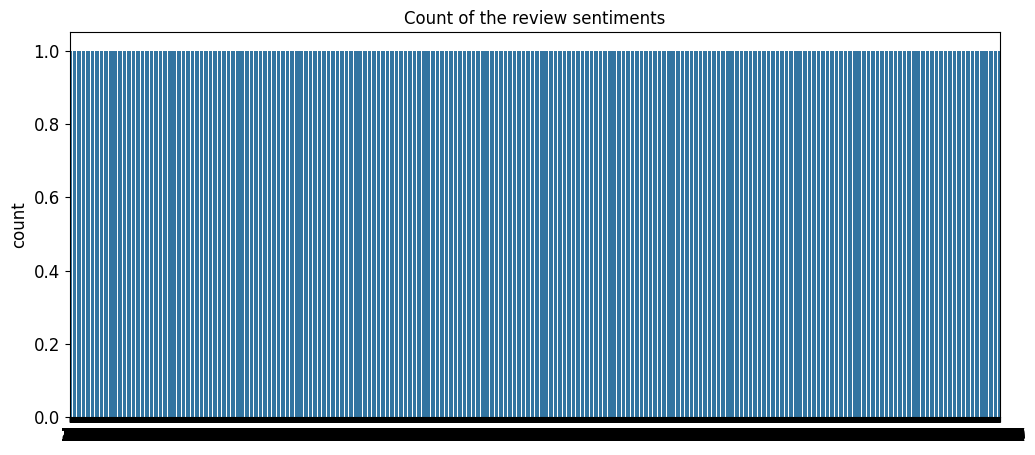

In [8]:
sns.countplot(reviews['sentiment'])
plt.title('Count of the review sentiments')
plt.show()

- _The data seems to be fairly balanced. However, the objective of this project is to do topic modeling and not sentiment classification_

## _Text Preprocessing_
_Following steps will be performed_
- Tokenization - Split the text into sentences and sentences into words. Lowercase the words and remove any punctuation_
- All stopwords will be removed_
- Eliminate the tokens except nouns, noun phrases and verbs.
- Words are lemmatized - words in third person are changed to first person and words in future and past tense are changed to present tense_

In [9]:
# write your code here:
def separate_reviews(df):
    sentiments = []
    review_list = []
    for _, row in df.iterrows():
        sentiments.append(row['sentiment'])
        review_list.append(row['review'])
    return sentiments, review_list

file_path = "K8 Reviews v0.2.csv"
sentiments, review_list = separate_reviews(reviews)

In [10]:
from nltk import pos_tag
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return "a"
    elif tag.startswith('V'):
        return "v"
    elif tag.startswith('R'):
        return "r"
    else:
        return "n"

def preprocess_reviews_fixed(review_list):
    processed_reviews = []
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    for review in review_list:

        # Tokenize into sentences and then words
        sentences = sent_tokenize(review.lower())
        tokens = [word for sent in sentences for word in word_tokenize(sent)]

        # Remove punctuation and stopwords
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

        # Part-of-Speech (POS) tagging
        pos_tags = pos_tag(tokens)

        # Lemmatize tokens
        lemmatized_tokens = [
            lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags
        ]

        # Filter after lemmatization
        filtered_tokens = [
            token for token, pos in pos_tag(lemmatized_tokens)
            if pos.startswith('NN') or pos.startswith('VB')
        ]

        processed_reviews.append(filtered_tokens)

    return processed_reviews

processed_reviews = preprocess_reviews_fixed(review_list)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Topic Modeling

Implement topic modeling using Latent Dirichlet Allocation (LDA) which is a topic modeling technique for uncovering the central topics and their distributions across a set of documents. Identify and list the top 5 topics found in the reviews along with their associated keywords.

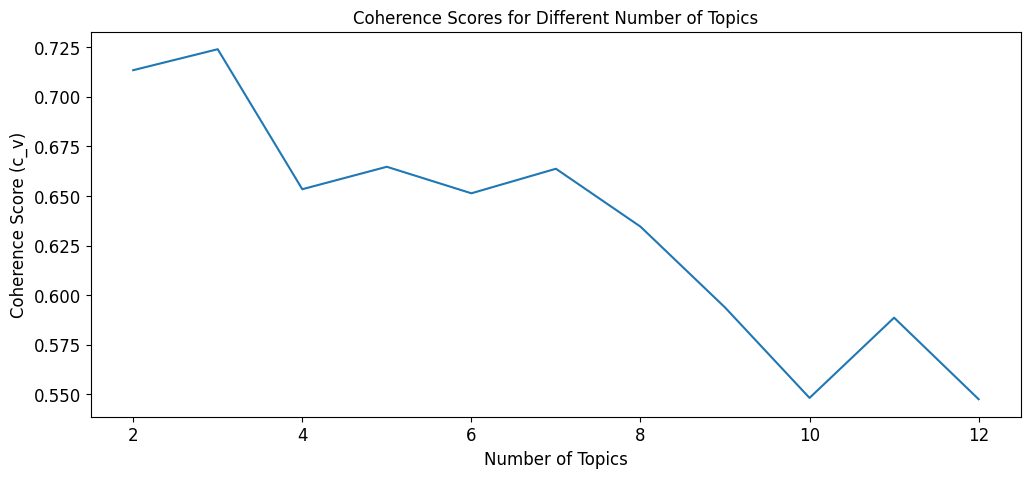


Top topics discovered:
Topic 3: 0.194*"problem" + 0.095*"phone" + 0.086*"heating" + 0.068*"hang" + 0.067*"waste"
Topic 4: 0.293*"work" + 0.050*"screen" + 0.040*"speaker" + 0.036*"cast" + 0.029*"month"
Topic 1: 0.153*"charge" + 0.097*"heat" + 0.069*"get" + 0.066*"phone" + 0.063*"battery"
Topic 5: 0.119*"device" + 0.098*"performance" + 0.047*"h" + 0.045*"good" + 0.039*"note"
Topic 7: 0.272*"camera" + 0.124*"quality" + 0.028*"performance" + 0.025*"display" + 0.021*"sound"


In [12]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

dictionary = corpora.Dictionary(processed_reviews)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(review) for review in processed_reviews]

def evaluate_coherence(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=30, random_state=42)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Evaluate coherence for a range of topic numbers
start, limit, step = 2, 13, 1
models, coherence_values = evaluate_coherence(dictionary, corpus, processed_reviews, start, limit, step)

# Plot coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Coherence Scores for Different Number of Topics")
plt.show()

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=12, passes=30)
optimal_lda_model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=30)

print("\nTop topics discovered:")
for idx, topic in lda_model.print_topics(num_topics=5, num_words=5):
    print(f"Topic {idx+1}: {topic}")


### Reporting

Summarizing the findings, including:
• How did you select the number of topics?
• Coherence score measures how semantically related the top words are in each topic.
Which coherence type did you employ (c v, u mass or uci)?
• The most common topics identified in the reviews.
• Print examples of reviews that belong to each topic.

INTRODUCTION

This report focuses on topic modeling performed on customer reviews from an e-commerce platform. Using Latent Dirichlet Allocation (LDA), the goal was to uncover underlying themes in the reviews, applying preprocessing, Part-of-Speech (POS) tagging, and lemmatization to improve the quality of results. The report also evaluates the coherence of topics to validate their interpretability and relevance.

PREPROCESSING

Text preprocessing is a crucial step to ensure meaningful and accurate topic modeling. The following steps were performed:

- Text Cleaning: Special characters, numbers, and stop words were removed from the reviews.
Words were normalized to their lowercase forms.
- Lemmatization: Words were lemmatized to their base forms using the WordNet lemmatizer. For example, "running" was normalized to "run".
- Part-of-Speech (POS) Tagging: POS tagging was performed using the nltk library.
Only nouns and verbs were retained for topic modeling, as these parts of speech typically carry the most semantic weight in reviews.

TOPIC MODELING

Topic modeling was performed using Latent Dirichlet Allocation (LDA) with the following parameters:

Number of Topics: The optimal number of topics was chosen as 3. This decision was informed by the coherence scores graph (can be found in previous part). The coherence score graph shows the semantic quality of topics for different numbers of topics (ranging from 2 to 12). The coherence score was highest for 3 topics (above 0.72), but it declined steadily as the number of topics increased. At 12 topics, the coherence score was around 0.55.

Coherence Type: The c_v coherence metric was employed. This metric measures the semantic similarity of words in each topic, making it suitable for evaluating interpretability in human-readable terms.

TOP 5 TOPICS DISCOVERED:

In [ ]:
Top topics discovered:
Topic 3: 0.194*"problem" + 0.095*"phone" + 0.086*"heating" + 0.068*"hang" + 0.067*"waste"
Topic 4: 0.293*"work" + 0.050*"screen" + 0.040*"speaker" + 0.036*"cast" + 0.029*"month"
Topic 1: 0.153*"charge" + 0.097*"heat" + 0.069*"get" + 0.066*"phone" + 0.063*"battery"
Topic 5: 0.119*"device" + 0.098*"performance" + 0.047*"h" + 0.045*"good" + 0.039*"note"
Topic 7: 0.272*"camera" + 0.124*"quality" + 0.028*"performance" + 0.025*"display" + 0.021*"sound"

Topic Analysis

Topic 1: Problems and Dissatisfaction

Customers are frustrated with unresolved product defects, leading to an overall negative perception.
Heating and hanging issues point to a need for better optimization of hardware and software.

Topic 2: Hardware and Durability

Poor hardware quality undermines customer confidence in the product's longevity.
Frequent issues with screens and speakers suggest insufficient testing or low-quality components.

Topic 3: Battery and Heating Issues

Poor battery life and overheating are significant pain points, potentially leading to customer dissatisfaction and returns.
The frequency of these issues indicates a need for better power management systems.

Topic 4: Device Performance and General Satisfaction

Customers appreciate good performance but are likely comparing it to other issues (battery, heating, hardware).
Positive sentiments suggest the product meets expectations in some areas but fails in others.

Topic 5: Camera Quality and Display

The camera is a strong selling point, with customers frequently mentioning its quality as a highlight.
Display and sound are secondary factors but still influence the overall perception of quality.

Combining Topics

From a business perspective, some of these topics overlap in their themes, making it possible to merge them.

Merge Topic 1 and Topic 3:
Both topics deal with technical issues that lead to dissatisfaction, particularly battery problems, overheating, and general device reliability.

Merge Topic 2 and Topic 4:
Hardware qualitydirectly impacts the perceived performance and satisfaction  Complaints about screens, speakers, and durability tie closely to performance issues.


Examples of reviews for each topic can be found below:

In [14]:
# Map reviews to their dominant topic
review_topics = []
for bow in corpus:
    topic_probs = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # Topic with highest probability
    review_topics.append(dominant_topic)

# Add topics to the reviews DataFrame
data_with_topics = pd.DataFrame({
    'Review': review_list,
    'Dominant Topic': review_topics
})

# Display example reviews for each topic
for topic_id in range(5):
    print(f"\nExamples for Topic {topic_id+1}:")
    examples = data_with_topics[data_with_topics['Dominant Topic'] == topic_id]['Review'].head(3)
    print(examples.tolist())



Examples for Topic 1:
["Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.", 'when I will get my 10% cash back.... its already 15 January..', 'Good']

Examples for Topic 2:
['Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note', "It's over hitting problems...and phone hanging problems Lenovo k 8 note...so where is service station in Ahmedabad it's one years warranty so it's can change the phone by lenovo", 'Good smartphone']

Examples for Topic 3:
['Superb featurs. Good battery Loved this phone😍😍', 'Good phone but he

### Visualization

Plot word clouds for each topic displaying associated keywords

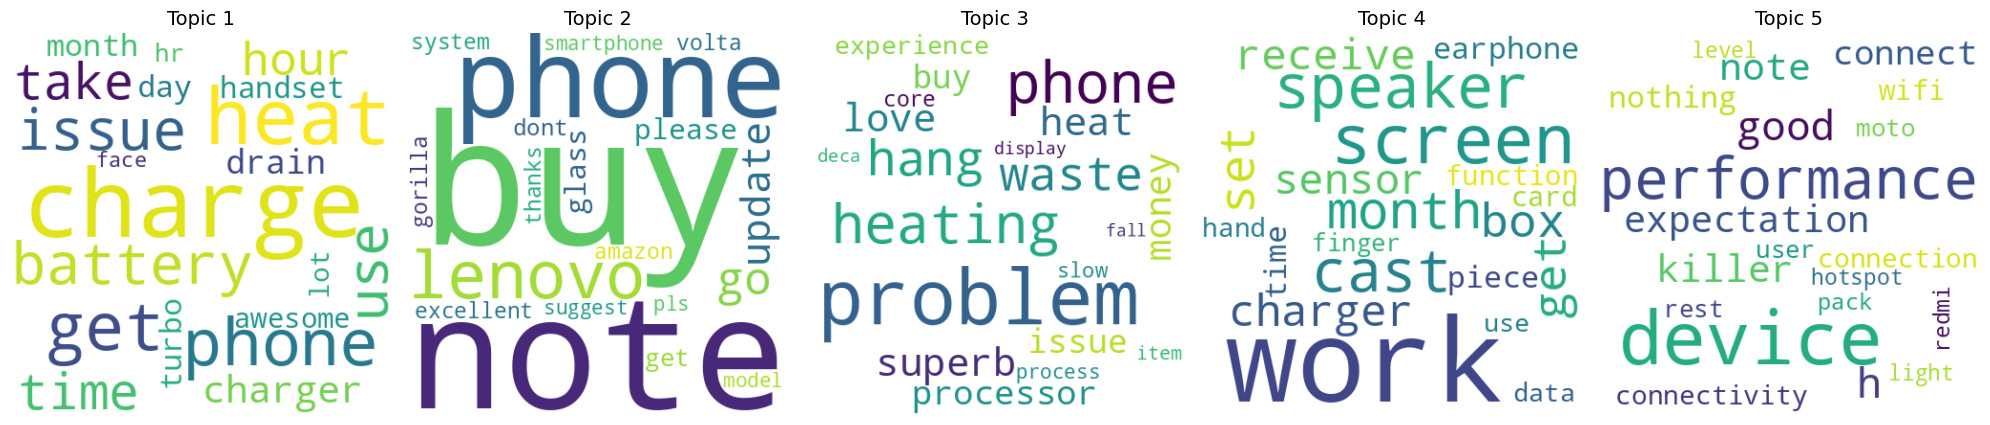

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize_topics_with_wordcloud(lda_model, num_topics=5):
    fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        topic_terms = dict(lda_model.show_topic(i, topn=20))
        wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_terms)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f"Topic {i+1}", fontsize=14)

    plt.tight_layout()
    plt.show()

visualize_topics_with_wordcloud(lda_model, num_topics=5)
